In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df= pd.read_excel("D:\online drives.xlsx")

In [12]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [13]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [17]:
df['END_DATE']= df['END_DATE'].fillna(0)
df['CATEGORY']= df['CATEGORY'].fillna(0)
df['START']= df['START'].fillna(0)
df['STOP']= df['STOP'].fillna(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1156 non-null   object 
 2   CATEGORY    1156 non-null   object 
 3   START       1156 non-null   object 
 4   STOP        1156 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [24]:
df= df.rename(columns= {df.columns[0]:'startdate',df.columns[1]:'enddate', df.columns[2]:'category', df.columns[3]:'start', 
                        df.columns[4]:'stop', df.columns[5]:'miles', df.columns[6]:'purpose' })

In [25]:
df.head()

,startdate,enddate,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [26]:
df.category.value_counts()

Business    1078
Personal      77
0              1
Name: category, dtype: int64

In [39]:
df[df.start.str.contains('\?') == True]
df.head(5)

,startdate,enddate,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [31]:
df['start'] = df['start'].replace({"\?":"a"}, regex = True)
df["stop"] = df["stop"].replace({"\?":"a"}, regex = True)

In [32]:
df

,startdate,enddate,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [42]:
category = pd.crosstab(index = df['category'], columns = 'travel count as per category')
category

col_0,travel count as per category
category,
0,1
Business,1078
Personal,77


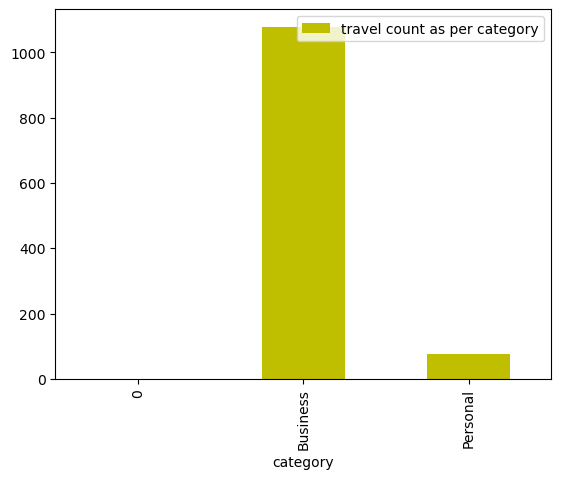

In [44]:
category.plot(kind = 'bar', color = 'y')
plt.legend()

In [46]:
start_point = df.start.value_counts()
start_point

Cary                 201
Unknown Location     148
Morrisville           85
Whitebridge           68
Islamabad             57
                    ... 
Ridgeland              1
Daytona Beach          1
Sky Lake               1
Sand Lake Commons      1
0                      1
Name: start, Length: 176, dtype: int64

In [47]:
print(start_point[start_point > 10])

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Karachi              31
Raleigh              28
Westpark Place       17
Apex                 17
Berkeley             16
Rawalpindi           16
Midtown              14
Kenner               11
Kissimmee            11
Name: start, dtype: int64


<AxesSubplot:ylabel='start'>

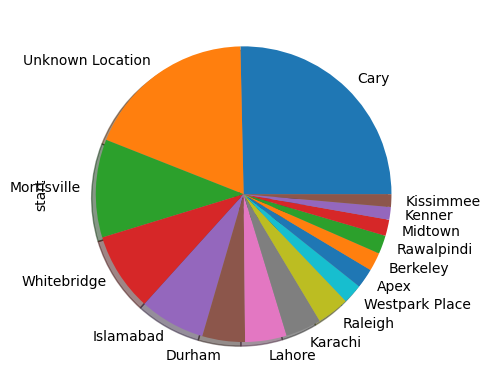

In [48]:
start_point[start_point > 10].plot(kind = 'pie', shadow = True)

In [49]:
print(start_point[start_point <= 10])

Emeryville           10
New Orleans          10
Downtown              9
Central               8
Orlando               8
                     ..
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Sand Lake Commons     1
0                     1
Name: start, Length: 160, dtype: int64


In [51]:
stop_point = df.stop.value_counts()
stop_point

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
0                      1
Name: stop, Length: 187, dtype: int64

In [52]:
print(stop_point[stop_point > 10])

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Karachi              28
Rawalpindi           18
Apex                 17
Berkeley             16
Westpark Place       16
Kissimmee            12
Midtown              11
Name: stop, dtype: int64


<AxesSubplot:ylabel='stop'>

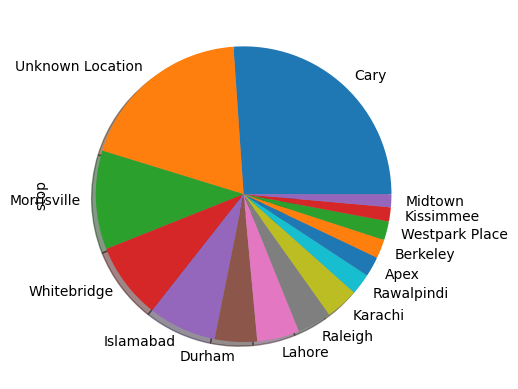

In [53]:
stop_point[stop_point > 10].plot(kind = 'pie', shadow = True)

In [54]:
print(stop_point[stop_point <= 10])

Edgehill Farms       10
New Orleans          10
Kenner               10
Emeryville            9
Central               9
                     ..
Daytona Beach         1
Sand Lake Commons     1
Sky Lake              1
Vista East            1
0                     1
Name: stop, Length: 172, dtype: int64


In [56]:
miles_count = df.miles.value_counts()
miles_count

9.9        28
3.1        26
2.1        19
10.4       19
3.0        19
           ..
30.0        1
46.9        1
40.2        1
16.6        1
12204.7     1
Name: miles, Length: 257, dtype: int64

<AxesSubplot:>

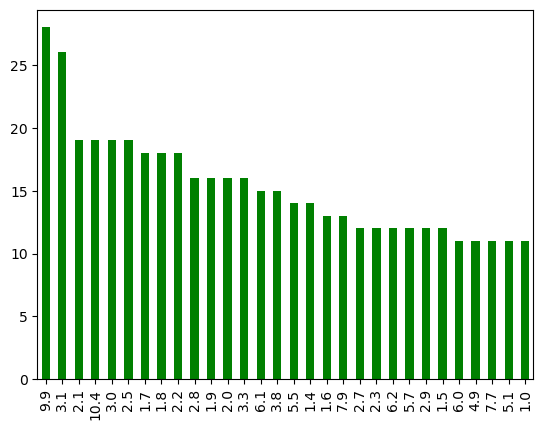

In [57]:
miles_count[miles_count > 10].plot(kind = 'bar', color = 'g')

In [58]:
print(miles_count[miles_count <= 10])

8.4        10
8.7        10
3.9        10
3.6        10
5.3        10
           ..
30.0        1
46.9        1
40.2        1
16.6        1
12204.7     1
Name: miles, Length: 227, dtype: int64


In [60]:
miles = pd.crosstab(index = df['miles'] > 10, columns = 'count of miles')
miles

col_0,count of miles
miles,
False,840
True,316


<AxesSubplot:xlabel='miles'>

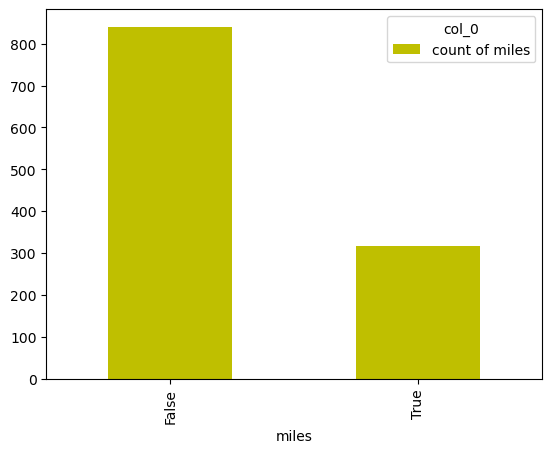

In [62]:
miles.plot(kind = 'bar', color = 'y')

In [64]:
print(df.purpose.value_counts())

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: purpose, dtype: int64


<AxesSubplot:ylabel='count'>

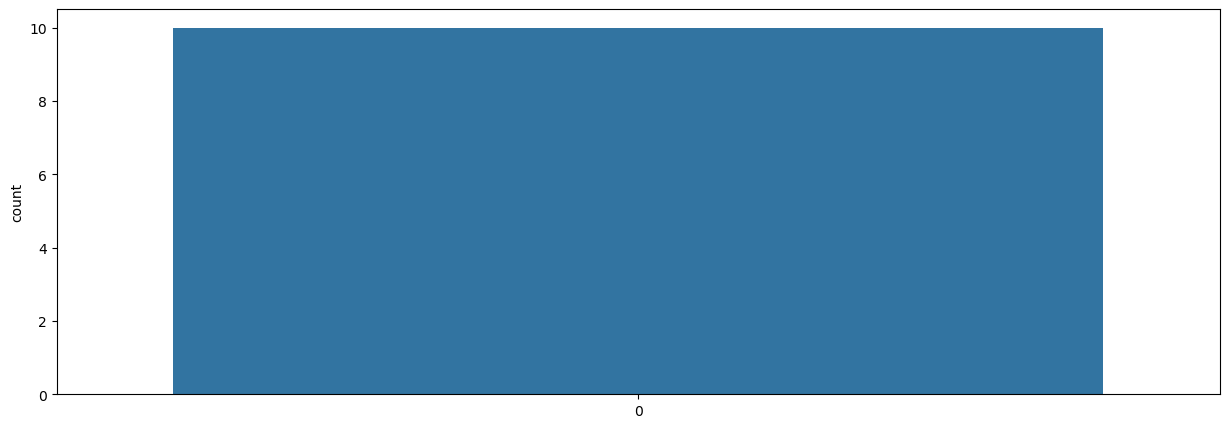

In [73]:
plt.figure(figsize = (15,5))
sns.countplot( df['purpose'].value_counts())

In [78]:
pd.DataFrame({'Mean' : df.groupby(['purpose'])['miles'].mean().round(1),
              'Min' : df.groupby(['purpose'])['miles'].min(),
              'Max' : df.groupby(['purpose'])['miles'].max()}).reset_index()

,purpose,Mean,Min,Max
0,Airport/Travel,5.5,4.1,7.6
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,20.7,0.8,310.3
5,Errand/Supplies,4.0,0.5,22.3
6,Meal/Entertain,5.7,0.6,36.5
7,Meeting,15.2,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,10.5,1.8,48.2


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

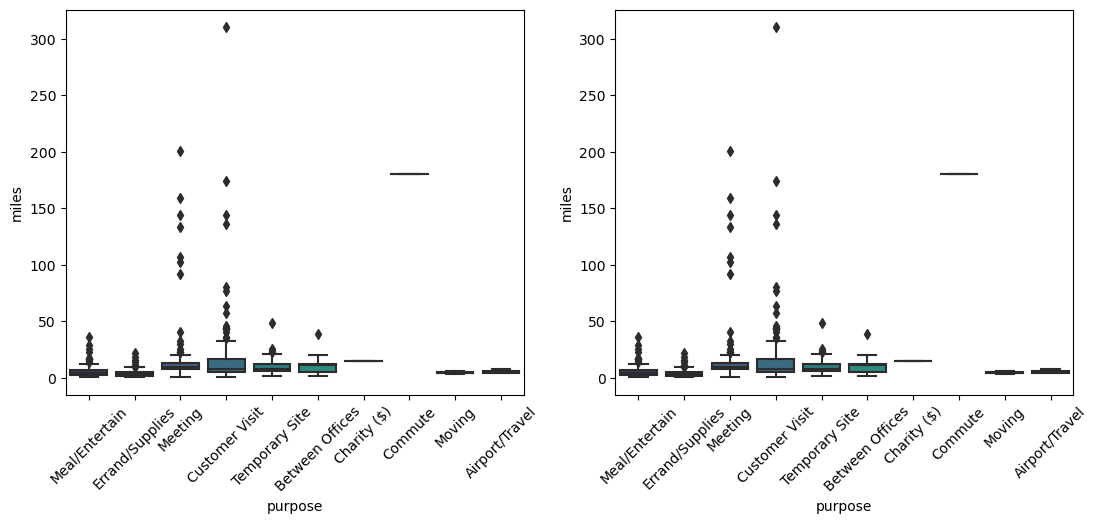

In [81]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = df.purpose, y = df.miles, palette = 'viridis')
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data = df, x = df.purpose, y = df.miles, palette = 'viridis')
plt.xticks(rotation = 45)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

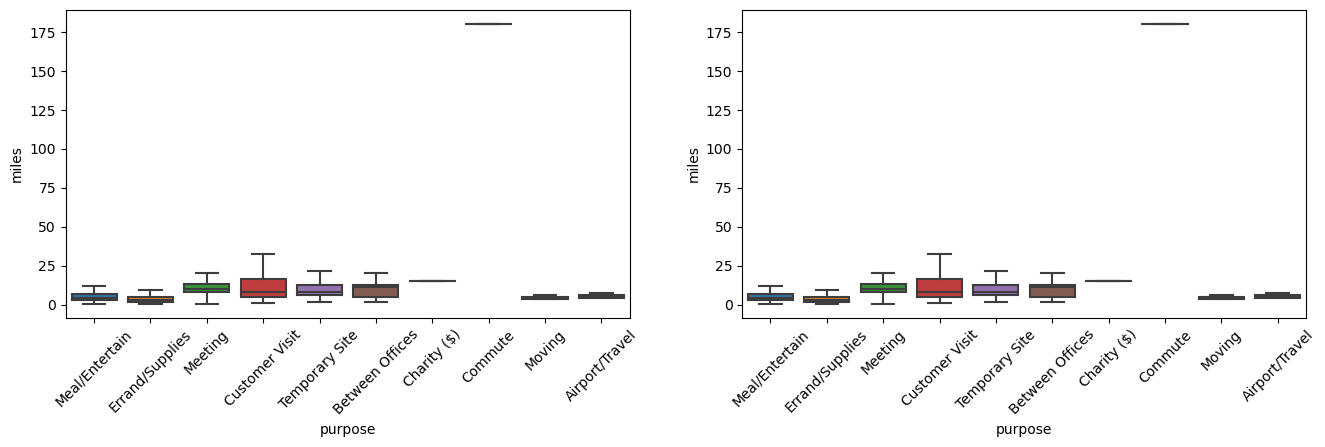

In [82]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.boxplot(data = df, x = df.purpose, y = df.miles, showfliers = False)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data = df, x = df.purpose, y = df.miles, showfliers = False)
plt.xticks(rotation = 45)

In [83]:
plt.figure(figsize = (8,5))
def round(x):
  if x['start'] == x['stop']:
    return 'yes'
  else:
    return 'no'

df['Round_trip'] = df.apply(round, axis = 1)
df

,startdate,enddate,category,start,stop,miles,purpose,Round_trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,yes
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,yes
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,yes
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,yes
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,no
...,...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site,no
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,yes
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,no
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,no


<Figure size 800x500 with 0 Axes>

<AxesSubplot:ylabel='count'>

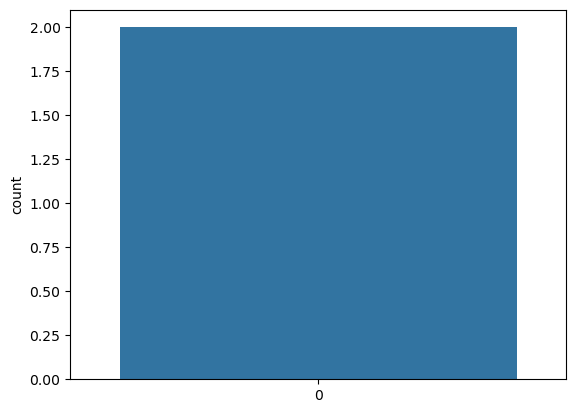

In [88]:
sns.countplot(df['Round_trip'].value_counts())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

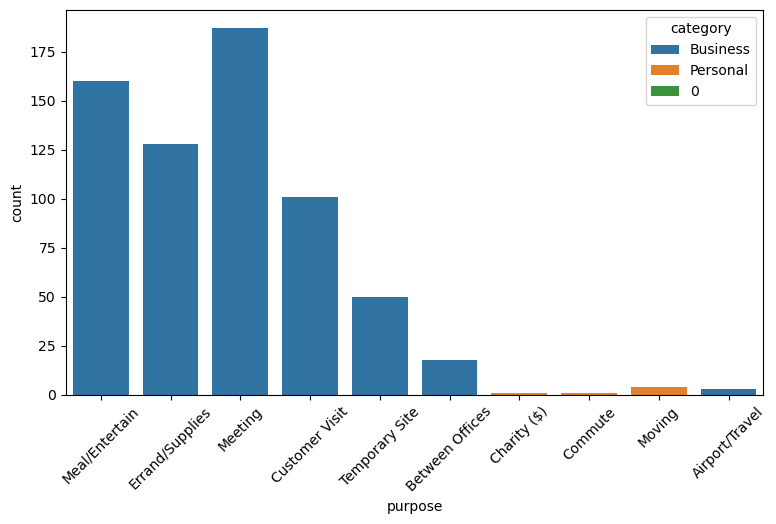

In [91]:
plt.figure(figsize = (9,5))
sns.countplot(data = df, x = 'purpose', hue = 'category', dodge = False)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Karachi'),
  Text(8, 0, 'Raleigh'),
  Text(9, 0, 'Westpark Place'),
  Text(10, 0, 'Apex'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'Rawalpindi'),
  Text(13, 0, 'Midtown'),
  Text(14, 0, 'Kenner'),
  Text(15, 0, 'Kissimmee'),
  Text(16, 0, 'Emeryville'),
  Text(17, 0, 'New Orleans'),
  Text(18, 0, 'Downtown'),
  Text(19, 0, 'Central'),
  Text(20, 0, 'Orlando'),
  Text(21, 0, 'Banner Elk'),
  Text(22, 0, 'Colombo'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'Edgehill Farms')])

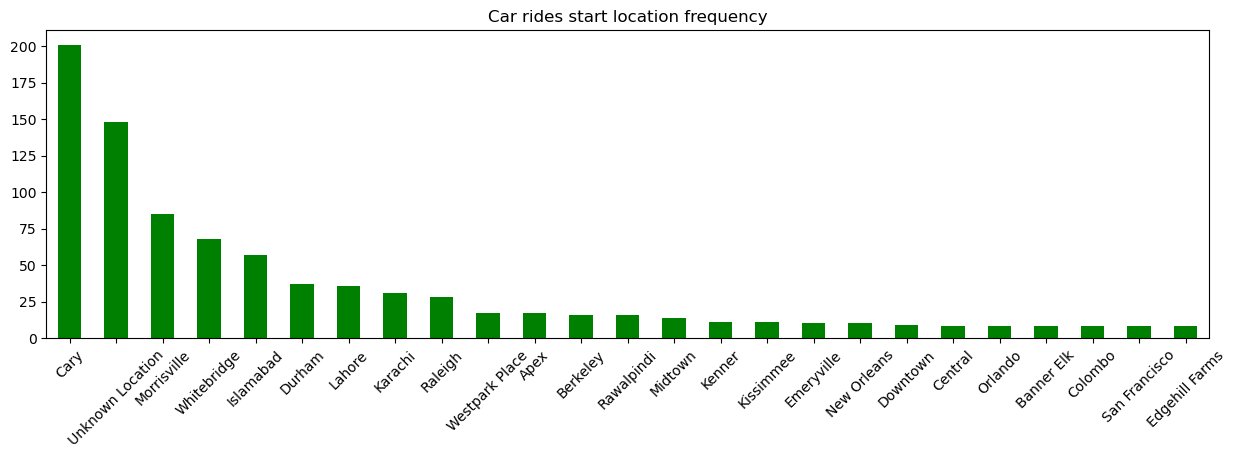

In [92]:
plt.figure(figsize = (15,4))
pd.Series(df['start']).value_counts()[:25].plot(kind = 'bar', color = 'g')
plt.title('Car rides start location frequency')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Karachi'),
  Text(9, 0, 'Rawalpindi'),
  Text(10, 0, 'Apex'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'Westpark Place'),
  Text(13, 0, 'Kissimmee'),
  Text(14, 0, 'Midtown'),
  Text(15, 0, 'Edgehill Farms'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Kenner'),
  Text(18, 0, 'Emeryville'),
  Text(19, 0, 'Central'),
  Text(20, 0, 'Oakland'),
  Text(21, 0, 'Banner Elk'),
  Text(22, 0, 'Colombo'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'The Drag')])

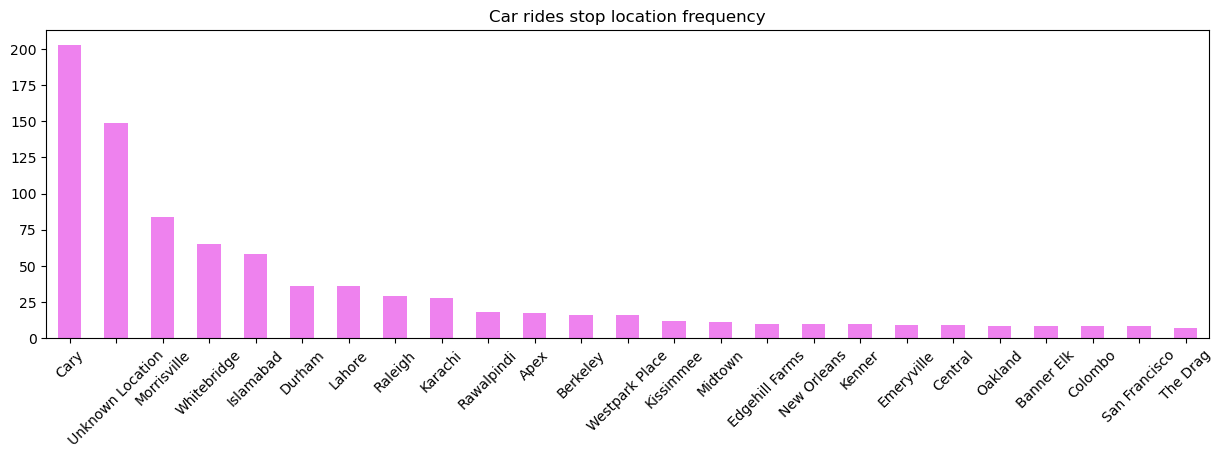

In [93]:
plt.figure(figsize = (15,4))
pd.Series(df['stop']).value_counts()[:25].plot(kind = 'bar', color = 'violet')
plt.title('Car rides stop location frequency')
plt.xticks(rotation = 45)